# Preparing Data for Machine Learning Practice

### Task 1.1 : Import Required Liabraries

In [1]:
#importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
import sklearn.metrics as me

### Task 1.2 : Import Data From Data Source

In [2]:
#importing dataframe

df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S1_Income_Data_Practice.csv')
df.head(10)

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K


### Task 2.1 Check Structure of Data

In [3]:
#finding rows and columns in dataframe
df.shape  

(32561, 14)

In [4]:
#checking structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [5]:
# findings columns
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

### Task 2.2 : Summarize the Data

In [6]:
#summarizing data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Task 3.1 : Check if there any missing value exists in any feature, identify those features

In [7]:
#finding missing values
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

### Task 4.1 : Convert Non-Numeric Labeled Columns into Categorical Type

In [8]:
def cat(x):
    cat=[]
    for i in df.columns:
        if x[i].nunique('int64')<10:
            cat.append(i)
    return cat

In [9]:
cat(df)

['WorkClass', 'Marital_Status', 'Relationship', 'Gender', 'Income_Bracket']

In [10]:
df['WorkClass']=df['WorkClass'].astype('object')
df['Marital_Status']=df['Marital_Status'].astype('object')
df['Relationship']=df['Relationship'].astype('object')
df['Gender']=df['Gender'].astype('object')
df['Income_Bracket']=df['Income_Bracket'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


### Task 4.2 : Use Label Encoder Technique to Convert Categorical Columns Numerical Type

In [12]:
#Label Encoding

In [13]:
cat_col=df.select_dtypes('object').columns
print(cat_col)

lbl_end=preprocessing.LabelEncoder()

for i in cat_col:
    df[i]=lbl_end.fit_transform(df[i])
    
df

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')


,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,1,0,0,20,39,0


### Task 4.3 : Perform the Data Scaling

In [14]:
#data scaling

def feature_scaling(scale):
    if scale=='minmax':
        scalar=preprocessing.MinMaxScaler()
    else:
        scalar=preprocessing.StandardScaler()
    df_scale=pd.DataFrame(scalar.fit_transform(df),columns=df.columns)
    return df_scale

final_df=feature_scaling('minmax')
final_df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.0,0.00000,0.0,0.397959,0.121951,0.0


### Task 4.4 : Select best features based on their correlation values

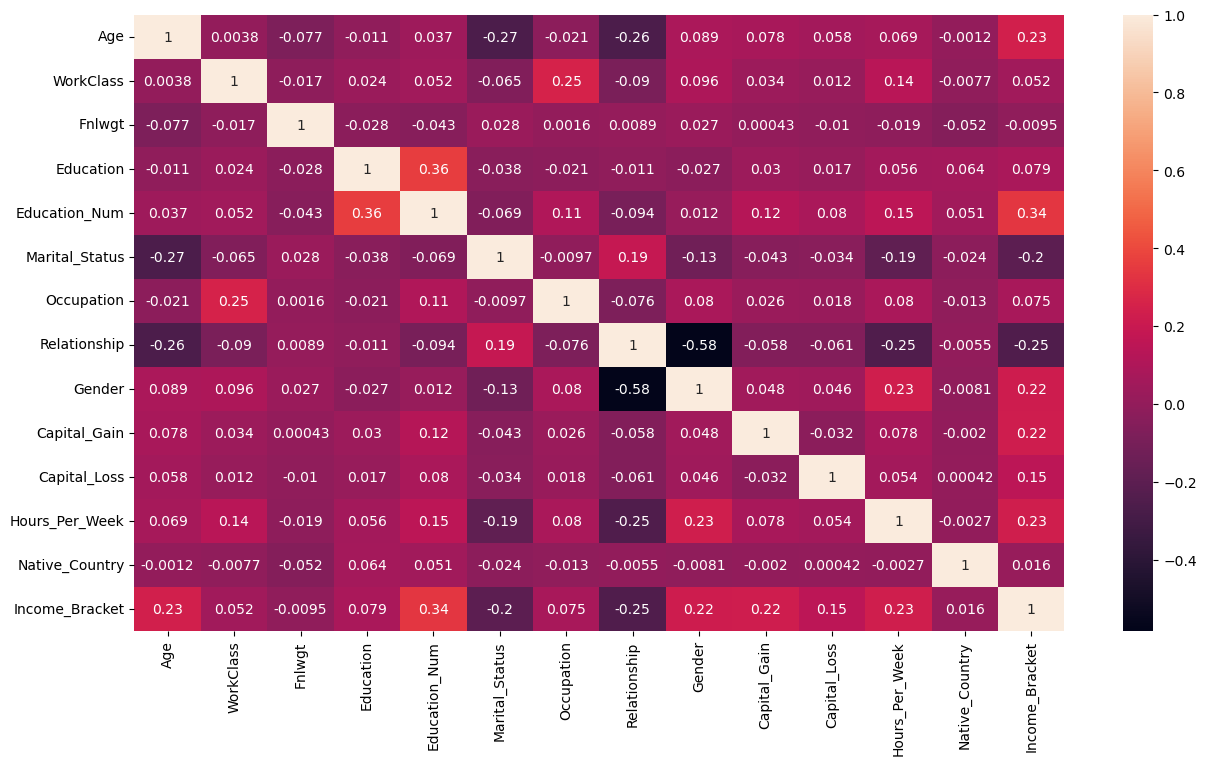

In [15]:
#Feature Selection
plt.figure(figsize=(15,8))
sb.heatmap(final_df.corr(),annot=True)
plt.plot();

### Task 5.1 : Split the data into train set and test set into 70:30 ratio by row index

In [16]:
#Data Splitting

In [17]:
#Splitting the data into train set and test set into 70:30 ratio by row index

print("No of rows : ",final_df.shape[0])
n=int(df.shape[0]*0.7)
print("n : ",n)

X_train=final_df.iloc[:n,:]    
print("Training dataset size : ",X_train.shape)

X_test=final_df.iloc[n+1:,:]
print("Test dataset size : ",X_test.shape)

No of rows :  32561
n :  22792
Training dataset size :  (22792, 14)
Test dataset size :  (9768, 14)


### Task 5.2 : Split the data into train set and test set into 70:30 ratio by train_test_split() built in function

In [18]:
#Splitting the data into train set and test set into 70:30 ratio by train_test_split() built-in method

X=final_df
y=final_df["Income_Bracket"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [19]:
X_train

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
29313,0.383562,0.500,0.185256,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.0,0.000000,0.500000,0.951220,1.0
16021,0.068493,0.500,0.067810,0.733333,0.533333,0.666667,0.571429,0.2,0.0,0.0,0.000000,0.397959,0.951220,0.0
905,0.397260,0.500,0.108165,0.733333,0.533333,0.000000,0.500000,0.2,0.0,0.0,0.000000,0.377551,0.951220,0.0
31251,0.068493,0.875,0.165231,0.466667,0.733333,0.666667,0.714286,0.2,0.0,0.0,0.000000,0.142857,0.951220,0.0
3368,0.315068,0.750,0.143706,0.933333,0.933333,0.333333,0.714286,0.0,1.0,1.0,0.000000,0.704082,0.951220,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.506849,0.750,0.031657,1.000000,0.600000,0.333333,0.214286,0.0,1.0,0.0,0.362489,0.479592,0.951220,0.0
24423,0.520548,0.875,0.067131,0.466667,0.733333,0.000000,0.071429,0.6,1.0,0.0,0.000000,0.397959,0.951220,0.0
14147,0.205479,0.500,0.216823,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.0,0.000000,0.500000,0.073171,1.0
23320,0.534247,0.250,0.027620,0.666667,1.000000,0.000000,0.714286,0.2,0.0,0.0,0.383150,0.377551,0.951220,0.0


In [20]:
X_test

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
27144,0.136986,0.000,0.114776,0.133333,0.466667,0.333333,0.000000,0.0,1.0,0.0,0.0,0.448980,0.95122,0.0
11743,0.095890,0.500,0.151865,0.733333,0.533333,0.333333,0.214286,0.0,1.0,0.0,0.0,0.377551,0.95122,0.0
4306,0.178082,0.500,0.035990,0.733333,0.533333,0.333333,0.928571,0.0,1.0,0.0,0.0,0.397959,0.95122,1.0
19590,0.041096,0.500,0.071441,1.000000,0.600000,0.333333,0.214286,0.0,1.0,0.0,0.0,0.397959,0.95122,0.0
24990,0.506849,0.500,0.051435,1.000000,0.600000,0.000000,1.000000,0.2,1.0,0.0,0.0,0.551020,0.95122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27595,0.575342,0.000,0.090524,0.466667,0.733333,0.333333,0.000000,0.0,1.0,0.0,0.0,0.346939,0.95122,1.0
31516,0.342466,0.250,0.123696,1.000000,0.600000,0.333333,0.785714,0.0,1.0,0.0,0.0,0.397959,0.95122,1.0
18711,0.698630,0.250,0.013203,0.733333,0.533333,0.333333,0.357143,0.0,1.0,0.0,0.0,0.397959,0.95122,0.0
30164,0.342466,0.500,0.106104,0.533333,0.666667,0.000000,0.714286,0.2,0.0,0.0,0.0,0.397959,0.95122,0.0


In [21]:
y_train

29313    1.0
16021    0.0
905      0.0
31251    0.0
3368     1.0
        ... 
12119    0.0
24423    0.0
14147    1.0
23320    0.0
5640     0.0
Name: Income_Bracket, Length: 22792, dtype: float64

In [22]:
y_test

27144    0.0
11743    0.0
4306     1.0
19590    0.0
24990    0.0
        ... 
27595    1.0
31516    1.0
18711    0.0
30164    0.0
29181    0.0
Name: Income_Bracket, Length: 9769, dtype: float64

### Task 6 : Perform the feasible data visualization to present the data

In [23]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S1_Income_Data_Practice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


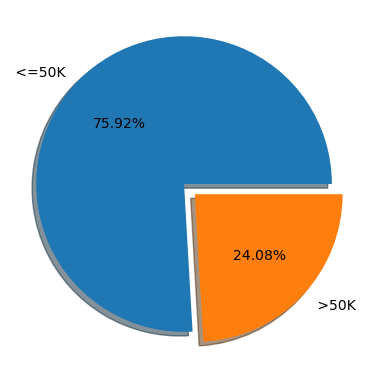

In [24]:
d_ind=df['Income_Bracket'].value_counts().index
d_value=df['Income_Bracket'].value_counts().values
plt.pie(x=d_value,labels=d_ind,autopct='%.2f%%',explode=[0.1,0],shadow=True)
plt.show()

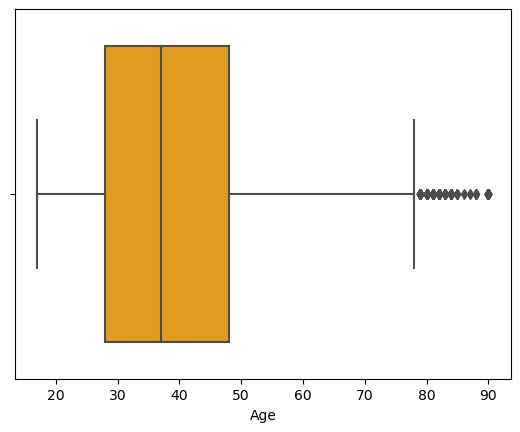

In [25]:
sb.boxplot(df['Age'],color='orange');

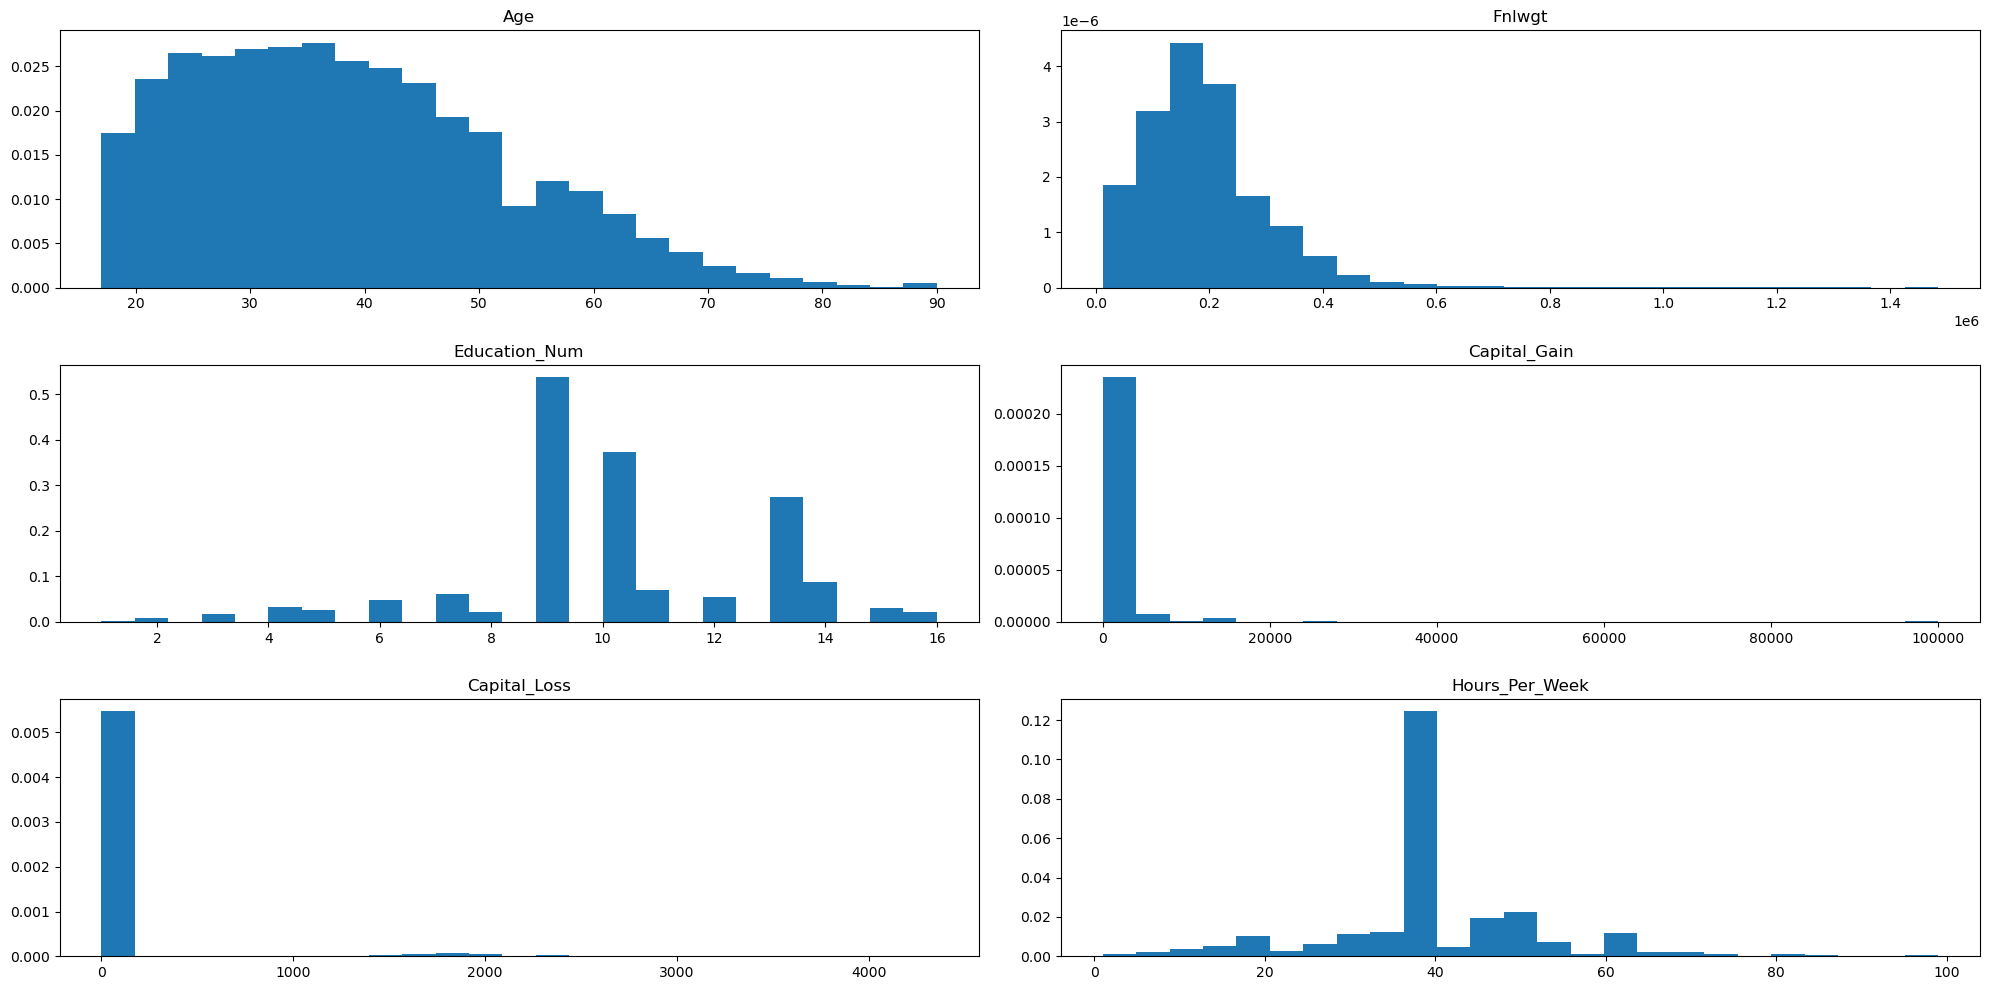

In [26]:
numerics=['int16','int32','int64','float16','float32','float64']
new_loan_df=df.select_dtypes(include=numerics)
numerics_col=new_loan_df.columns
n_col=2
n_bins=25
n_row=int((len(numerics_col)/n_col))
fig,axs=plt.subplots(n_row,n_col,tight_layout=True,figsize=(20,10))
for col,ax in zip(numerics_col,axs.flatten()[:len(numerics_col)]):
    ax.hist(new_loan_df[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()